In [34]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.io import wavfile
import os
import glob

def qdem(x):
    return np.angle(x[1:] * np.conj(x[:-1])) / (2 * np.pi)

file: recordings/sox_2025-08-17T17:54:49-05:00_452937500_48000_i32.wav
framerate: 48000, duration: 342.02 seconds


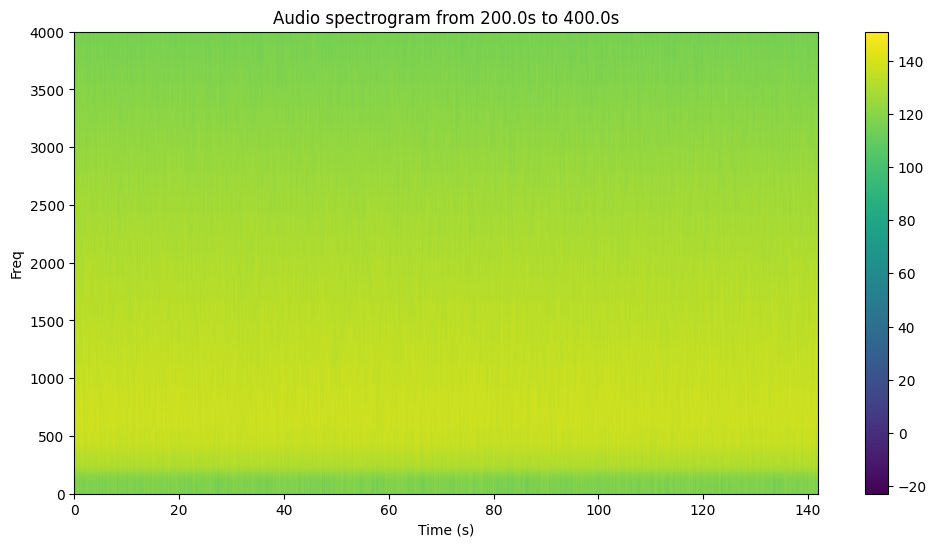

In [159]:
files = glob.glob('recordings/*.wav')
files.sort(key=os.path.getmtime)
fname = files[-1]

# fname = 'recordings/temp.wav'

print(f'file: {fname}')

framerate, data = wavfile.read(fname)

print(f'framerate: {framerate}, duration: {len(data)/framerate:.2f} seconds')
time = np.linspace(0, len(data) / framerate, num=nframes)

start_time = 200 * 1
duration = 200
start = int(start_time * framerate)
stop = int((start_time + duration) * framerate)

time = time[start:stop]
data = data[start:stop]

plt.figure(figsize=(12, 6)) # Adjust figure size as needed
plt.specgram(data, Fs=framerate, NFFT=256, noverlap=0, cmap='viridis')
plt.title(f'Audio spectrogram from {start_time:.1f}s to {start_time + duration:.1f}s')
plt.colorbar()
plt.xlabel('Time (s)')
plt.ylabel('Freq')
plt.ylim(0, 4e3)
plt.grid(False)
plt.show()

# Close the WAV file object
spf.close()

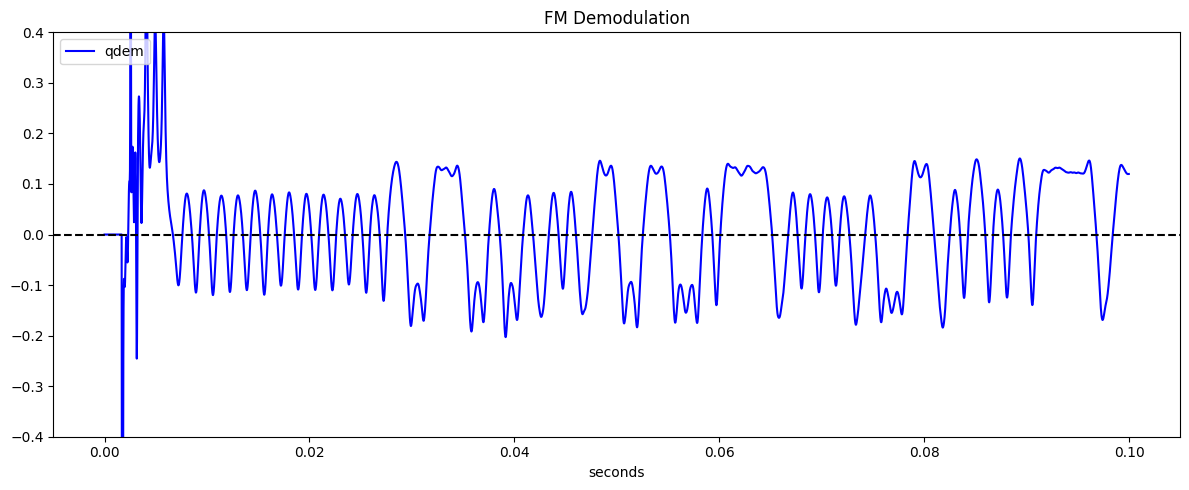

In [146]:
fs = framerate

t = np.arange(len(data))

lower = signal.lfilter(signal.firwin(301, cutoff=2400, fs=fs), 1.0, data)

mixed = lower * np.exp(-2j * np.pi * (-1500 / fs) * t)

fskbb = signal.lfilter(signal.firwin(301, cutoff=600, fs=fs), 1.0, mixed)

recovered_signal = qdem(fskbb) * 20
recovered_signal[:81] = 0

# recovered_signal = lower / 2**31

plt.figure(figsize=(12, 5))

plt.plot(np.linspace(0, len(recovered_signal)/fs, len(recovered_signal)), recovered_signal, color='blue', label='qdem')

display_max = 0.4

plt.axhline(0, color='black', linestyle='--')
plt.ylim(-display_max, display_max)
plt.xlabel('seconds')
plt.title('FM Demodulation')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()